# Poissoning

The goal of this exercise is to simulate Poissong noise, which can be used to simulate low-light imaging. Additionally Anscombe transform can be used to transform noise 
with Poisson distribution into noise with Gaussian distribution (not orthogonal transform), Gaussian noise can be removed by number of methods and then inverse Anscome transform
can be applied.

### Sources
* [https://en.wikipedia.org/wiki/Poissondistribution](https://en.wikipedia.org/wiki/Poissondistribution)
* [https://link.springer.com/chapter/10.1007/978-3-642-18443-7_1](https://link.springer.com/chapter/10.1007/978-3-642-18443-7_1)
* [https://link.springer.com/chapter/10.1007/978-3-030-12450-2_29](https://link.springer.com/chapter/10.1007/978-3-030-12450-2_29)
* [https://en.wikipedia.org/wiki/Generalized_mean#Special_cases](https://en.wikipedia.org/wiki/Generalized_mean#Special_cases)
* [https://en.wikipedia.org/wiki/Anscombe_transform](https://en.wikipedia.org/wiki/Anscombe_transform)
* [https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html](https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html)
* [https://sandaminimadhushika96.medium.com/mean-filter-in-image-processing-66fe7bb733e4](https://sandaminimadhushika96.medium.com/mean-filter-in-image-processing-66fe7bb733e4)
* [https://www.sciencedirect.com/science/article/pii/S1877050916002180](https://www.sciencedirect.com/science/article/pii/S1877050916002180)
* [https://arxiv.org/pdf/1609.05035.pdf](https://arxiv.org/pdf/1609.05035.pdf)

In [1]:
import sys

sys.path.append("../../src/")  # add sources to PYTHONPATH

In [2]:
import numpy as np
from numpy.typing import NDArray
from skimage import io, restoration

In [ ]:
def poissoning(image: NDArray, lambda_value: float) -> np.ndarray:
    """
    :param image: numpy array of shape (H, W, C) or (H, W)
    :param lambda_value: number of simulated photons per pixel (or per channel, depending on the image)
    """
    noised = np.random.poisson(image / image.max() * lambda_value) / lambda_value
    noised = np.clip(noised_image * 255, 0, 255).astype(int)
    return noised

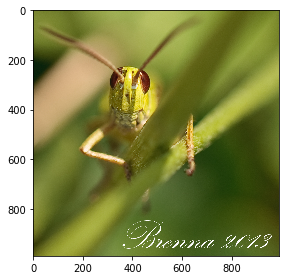

In [3]:
image = io.imread("../../data/image.jpg")
_ = io.imshow(image)

Apply poisson noise, which simulates registering image in low light setting. $\lambda$ is used to represted average number of photons emitted by the source.

In [4]:
noised_image = poissoning(image, lambda_value=64)
image.max(), noised_image.max()

(255, 255)

c:\users\kzaja\documents\research\github\frequency-neural-networks\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


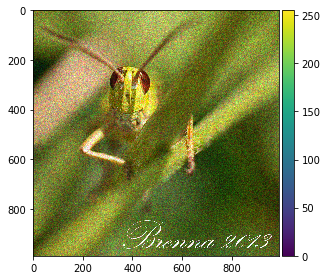

In [5]:
_ = io.imshow(noised_image)

Define Anscombe and inverse Anscombe transformations

In [6]:
def anscombe(x):
    """Computes Anscombe transform"""
    c = 3 / 8
    return 2 * np.sqrt(x + c)


def inv_anscombe(y):
    """Computes inverse Anscombe transform"""
    c = -1 * 3 / 8
    return np.power(0.5 * y, 2) + c

Depoissoning is a process of noise removal from the image using following steps:

1. Apply Anscombe transform to image to convert Poisson noise to Gaussian (image is not displayable, since the range of pixel intensities changes)
2. Remove noise using standard Gaussian removal method
3. Inverse transform the image with removed noise

In [7]:
def depoisson(image):
    x = image / image.max()
    x = anscombe(x)
    x = restoration.denoise_tv_chambolle(x)  # any Gaussian removal method can be used here
    x = inv_anscombe(x)
    return x

Apply depoissoning

In [8]:
transformed_image = depoisson(noised_image)
transformed_image.shape

(989, 989, 3)

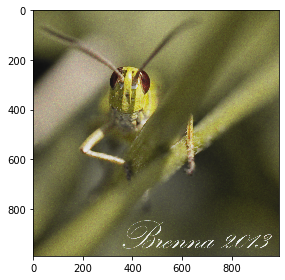

In [9]:
_ = io.imshow(transformed_image)